In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from glob import glob
import IPython.display as ipd
import librosa

from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.layers import Conv2D
from tensorflow.keras.layers import Input, BatchNormalization, Activation
from tensorflow.keras import Model


tf.random.set_seed(999)
np.random.seed(999)

In [37]:
window_length = 256

overlap = round(0.25 * window_length) # overlap of 75%

n_fft = window_length

feature_sample = 8000

n_features = n_fft//2 + 1

n_segments = 8

n_clean_segments = 1

In [38]:
with open('X_train_2.pkl', 'rb') as file:
    x_train = pickle.load(file)

with open('Y_train_2.pkl', 'rb') as file:
    y_train = pickle.load(file)
    
print(x_train.shape)

(178746, 129, 8, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
l2_strength=0.0

inputs = Input(shape=[n_features, n_segments, 1])
x = inputs
# -----
x = tf.keras.layers.ZeroPadding2D(((4,4), (0,0)))(x)
x = Conv2D(filters=18, kernel_size=[9,8], strides=[1, 1], padding='valid', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

skip0 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(skip0)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# -----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

skip1 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(skip1)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = x + skip1
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = x + skip0
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
        kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = tf.keras.layers.SpatialDropout2D(0.2)(x)
x = Conv2D(filters=1, kernel_size=[129,1], strides=[1, 1], padding='same')(x)

model = Model(inputs=inputs, outputs=x)

optimizer = tf.keras.optimizers.Adam(3e-4)
#optimizer = RAdam(total_steps=10000, warmup_proportion=0.1, min_lr=3e-4)

model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError('rmse')])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 129, 8, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 137, 8, 1)   0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 129, 1, 18)   1296        ['zero_padding2d_1[0][0]']       
                                                                                                  
 activation_15 (Activation)     (None, 129, 1, 18)   0           ['conv2d_16[0][0]']        

In [ ]:
# tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)
model = keras.models.load_model('model.h5')

model.load_weights('cnn_denoise_log.h5')

baseline_val_loss = model.evaluate(x_test, y_test)[0]
print(baseline_val_loss)

2023-03-21 06:38:23.199332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /app/lib
2023-03-21 06:38:23.199359: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-21 06:38:23.199433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-03-21 06:38:23.199758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


838/838 [==============================] - 8s 10ms/step - loss: 0.1402 - rmse: 0.3744
0.14019173383712769


In [ ]:
import os
import datetime

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, baseline=baseline_val_loss)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, update_freq='batch')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='cnn_denoise_log.h5', 
                                                         monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train,
         steps_per_epoch=600,
         epochs=100,
         validation_data=(x_val, y_val),
         callbacks=[early_stopping_callback, tensorboard_callback, checkpoint_callback]
)

model.save('model.h5')

Epoch 1/100


2023-03-21 06:39:03.163371: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 516503616 exceeds 10% of free system memory.


600/600 [==============================] - 130s 213ms/step - loss: 0.1587 - rmse: 0.3983 - val_loss: 0.1241 - val_rmse: 0.3523
Epoch 2/100
600/600 [==============================] - 114s 189ms/step - loss: 0.1442 - rmse: 0.3798 - val_loss: 0.1202 - val_rmse: 0.3467
Epoch 3/100
600/600 [==============================] - 112s 187ms/step - loss: 0.1389 - rmse: 0.3727 - val_loss: 0.1113 - val_rmse: 0.3337
Epoch 4/100
600/600 [==============================] - 114s 190ms/step - loss: 0.1338 - rmse: 0.3657 - val_loss: 0.1158 - val_rmse: 0.3404
Epoch 5/100
600/600 [==============================] - 131s 218ms/step - loss: 0.1301 - rmse: 0.3607 - val_loss: 0.1094 - val_rmse: 0.3307
Epoch 6/100
600/600 [==============================] - 112s 187ms/step - loss: 0.1296 - rmse: 0.3600 - val_loss: 0.1065 - val_rmse: 0.3264
Epoch 7/100
600/600 [==============================] - 112s 187ms/step - loss: 0.1271 - rmse: 0.3566 - val_loss: 0.1119 - val_rmse: 0.3345
Epoch 8/100
600/600 [==================

838/838 [==============================] - 10s 12ms/step - loss: 0.0843 - rmse: 0.2903
0.08428537845611572


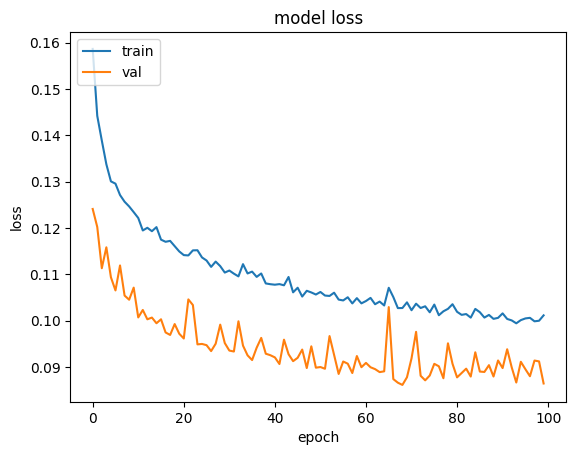

In [ ]:
val_loss = model.evaluate(x_test, y_test)[0]
print(val_loss)

# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

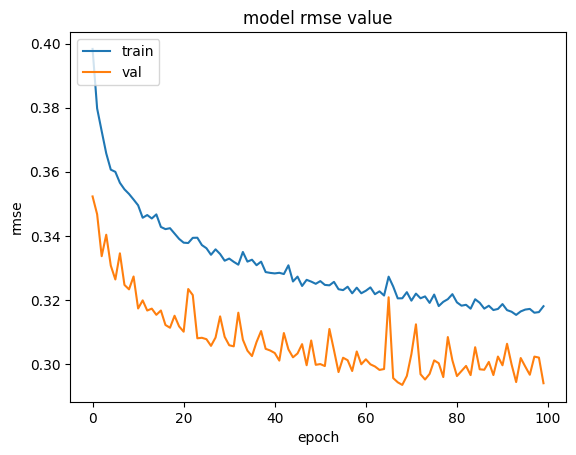

In [ ]:
# Visualize mse
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model rmse value')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [69]:
# Model testing
model = keras.models.load_model('model.h5')

with open('X_train_demonstration.pkl', 'rb') as file:
    demonstration = pickle.load(file)
    
with open('phase.pkl', 'rb') as file:
    phase = pickle.load(file)

demonstration = np.asarray(demonstration).astype('float32')
print(demonstration.shape)
result_from_model = model.predict(demonstration)

result_from_model.shape

(770, 129, 8, 1)
25/25 [==============================] - 1s 14ms/step


(770, 129, 1, 1)

In [70]:
# restore denoised file to wav format

clean_mean = 0.10795545 # tooked from data preparation file
clean_std = 0.42166725
         
def read_audio(filepath, sample_rate, normalize=True):
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize:
      div_fac = 1 / np.max(np.abs(audio)) / 3.0
      audio = audio * div_fac
    return audio, sr


def get_audio_from_stft_spectrogram(stft_features):
        return librosa.istft(stft_features, win_length=window_length, hop_length=overlap,
                             window='hamming', center=True)


def show_spectrogram(spectrogram, title):
    result = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max).astype(np.float32)
    plt.figure(figsize=(10,4))
    plt.imshow(result)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    

def revert_features_to_audio(features, phase, mean=None, std=None):
    # scale the outpus back to the original range
    if mean and std:
        features = std * features + mean

    phase = np.transpose(phase, (1, 0))
    features = np.squeeze(features)

    features = features * np.exp(1j * phase)  # that fixes the abs() ope previously done
    
    features = np.transpose(features, (1, 0))
    
    show_spectrogram(features, "Denoised stft")
    
    return get_audio_from_stft_spectrogram(features)

Min: -0.29570755 Max: 0.28207466


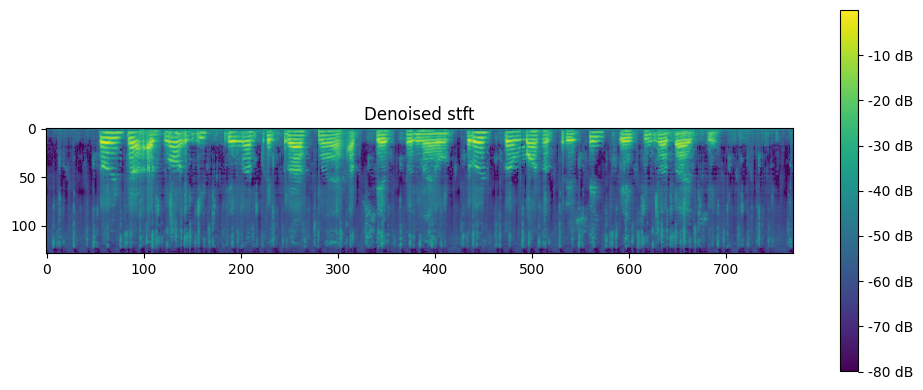

In [71]:
denoised = revert_features_to_audio(result_from_model, phase, clean_mean, clean_std)
print("Min:", np.min(denoised),"Max:",np.max(denoised))
ipd.Audio(data=denoised, rate=feature_sample) # show wav file

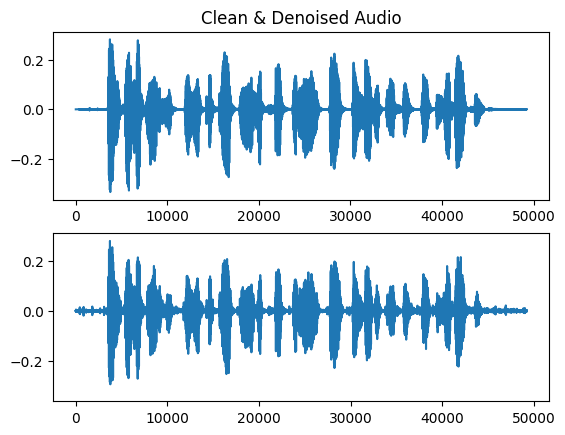

In [72]:
noisy_audio, sr = read_audio('noisy_file_example.wav', feature_sample)
clean_audio, sr = read_audio('clean_file_example.wav', feature_sample)
# denoised, sr = read_audio('denoised_file_example.wav', feature_sample)

f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

ax1.plot(clean_audio)
ax1.set_title("Clean & Denoised Audio")

ax2.plot(denoised)

In [73]:
import soundfile as sf

sf.write('denoised_file_example.wav',denoised, feature_sample)

In [ ]:
#!pip3 install https://github.com/schmiph2/pysepm/archive/master.zip

In [74]:
from pysepm import stoi, pesq
import mir_eval

# load reference and denoised signal
denoised = np.concatenate((denoised, np.zeros(clean_audio.size - denoised.size)), axis=0)
noisy = np.concatenate((noisy_audio, np.zeros(clean_audio.size - noisy_audio.size)), axis=0)

score = pesq(noisy, denoised, int(feature_sample))
score1 = pesq(clean_audio, noisy, int(feature_sample))

st = stoi(noisy, denoised, int(feature_sample), extended=False)
st1 = stoi(clean_audio, noisy, int(feature_sample), extended=False)

sdr, _,_,_= mir_eval.separation.bss_eval_sources(np.asarray([noisy_audio]), np.asarray([denoised]))

print("pesq score: ",score)
print("pesq score 1: ",score1)
print("stoi value: ", st)
print("stoi value 1: ", st1)
print("sdr value:", sdr[0])

pesq score:  (3.387841816013332, 3.396085023880005)
pesq score 1:  (2.178187337221257, 1.7868430614471436)
stoi value:  0.8729159940776211
stoi value 1:  0.7463348432013461
sdr value: 10.631786569812485
